In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PRML_LAB/Ticket_dataset.csv')

In [ ]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Data Analysis

In [ ]:
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Dropping null value

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


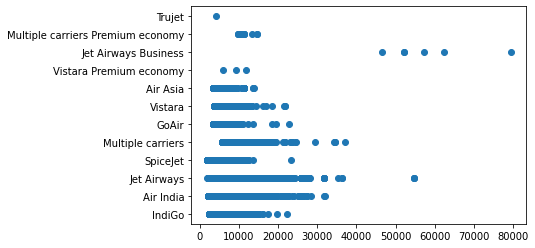

In [ ]:
plt.scatter( df["Price"],df["Airline"])
plt.show()

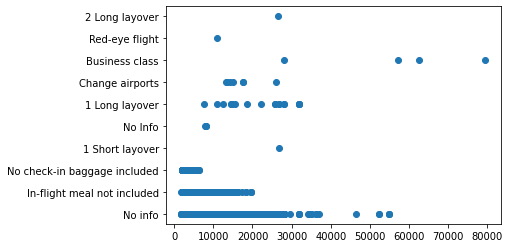

In [ ]:
plt.scatter( df["Price"],df["Additional_Info"])
plt.show()

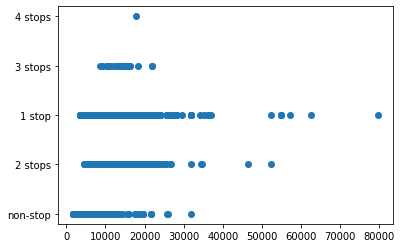

In [ ]:
plt.scatter( df["Price"],df["Total_Stops"])
plt.show()

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

Data cleaning

In [ ]:
# converting  Duration columns value (time) into min
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Splitting Date_of_Journey into journey_day,journey_month,journey_year to easily analyzing the data
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df["Journey_year"] = df['Date_of_Journey'].str.split('/').str[2].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Splitting the Dep_Time column into Dep_hour,Dep_min for analyze data easily
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

# same for Arrival_Time 
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,150,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,180,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,160,non-stop,No info,12648,1,3,2019,11,30,14,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  int64 
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Journey_year     10682 non-null  int64 
 11  Dep_hour         10682 non-null  int64 
 12  Dep_min          10682 non-null  int64 
 13  Arrival_hour     10682 non-null  int64 
 14  Arrival_min      10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [ ]:
Y=df['Price']
X=df.drop('Price',axis=1)

In [ ]:
X

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2 stops,No info,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1 stop,No info,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1 stop,No info,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,150,non-stop,No info,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,180,non-stop,No info,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,160,non-stop,No info,1,3,2019,11,30,14,10


In [ ]:
#spliiting the data frmae into Categorical Data and Numerical Data to easily encode
X_categorical_data = X.select_dtypes(exclude=['int64', 'float','int32'])
X_numerical_data = X.select_dtypes(include=['int64', 'float','int32'])

In [ ]:
X_categorical_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info


In [ ]:
# Encoding the categorical columns
le = LabelEncoder()
X_categorical_data = X_categorical_data.apply(LabelEncoder().fit_transform)

In [ ]:
X_categorical_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8
...,...,...,...,...,...,...
10678,0,3,0,64,4,8
10679,1,3,0,64,4,8
10680,4,0,2,18,4,8
10681,10,0,5,18,4,8


In [ ]:
# finally concating the X_categorical_data, X_numerical_data after encoding
X = pd.concat([X_categorical_data, X_numerical_data], axis=1)

In [ ]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Duration', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

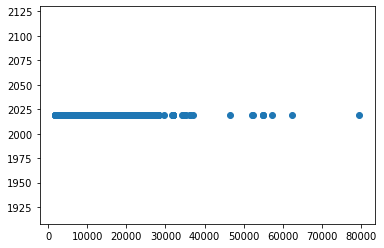

In [ ]:
plt.scatter( Y,X["Journey_year"])
plt.show()

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
print(len(Xtrain),len(Xtest))

7477 3205


Building Transformation class for pipeline

In [ ]:
class transformation(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, data, y):
        return self

    def transform(self, data):
        
        
        
        return data

In [ ]:
xlabel=[1,2,3,4,5,6,7,8,9,10,11,12]

Storing the r2_score for different principle components for Decision tree regressor using Pipeline

In [ ]:
r2scores_Dt=[]
max_score=0
for i in range(3,15):
  p=PCA(n_components=i)
  p.fit(X)
  x=p.transform(X)
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,Y,test_size=0.3,random_state=0)
  model_pipeline_lgb = Pipeline(steps=[('Preprocessing_Column_transformation',transformation()),('LGB', DTR(max_depth=17))])
  model_pipeline_lgb.fit(Xtrain,Ytrain)
  model_pred=model_pipeline_lgb.predict(Xtest)
  score=r2_score(model_pred,Ytest)
  r2scores_Dt.append(score)
  if score>max_score:
    max_score=score
  print(i,'R-Score',score)
print('max r2_score',max_score)
print(r2scores_Dt)

3 R-Score 0.294786080009694
4 R-Score 0.3613151333269531
5 R-Score 0.46076001466545724
6 R-Score 0.5186349545544039
7 R-Score 0.5217971210739738
8 R-Score 0.5599984921749865
9 R-Score 0.6391517954154566
10 R-Score 0.6153251574843441
11 R-Score 0.6645419742890379
12 R-Score 0.7152238727532729
13 R-Score 0.7019438380362439
14 R-Score 0.6794070204561622
max r2_score 0.7152238727532729
[0.294786080009694, 0.3613151333269531, 0.46076001466545724, 0.5186349545544039, 0.5217971210739738, 0.5599984921749865, 0.6391517954154566, 0.6153251574843441, 0.6645419742890379, 0.7152238727532729, 0.7019438380362439, 0.6794070204561622]


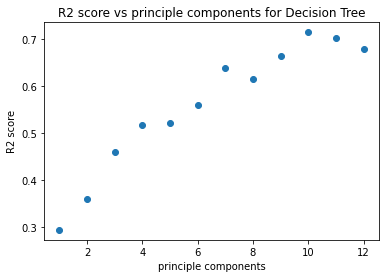

In [ ]:
plt.scatter(xlabel,r2scores_Dt)
plt.title('R2 score vs principle components for Decision Tree')
plt.xlabel('principle components')
plt.ylabel('R2 score')
plt.show()

In [ ]:
print(r2scores_Dt,max_score)

[0.2954359566239704, 0.35184736208093337, 0.44095316480010716, 0.49525589307306206, 0.5213876194212294, 0.5634775297848849, 0.6560489870703905, 0.613881555360259, 0.6882882126108317, 0.6769752806769105, 0.7095650006431939, 0.6929958977932257] 0.7095650006431939


fitting the data into pipeline for model Decision tree regressor without using PCA

In [ ]:
model_pipeline_dt = Pipeline(steps=[(' Preprocessing_Column_transformation',transformation()),('Decision_tree', DTR(max_depth=17))])

In [ ]:
model_pipeline_dt.fit(Xtrain,Ytrain)
model_pred=model_pipeline_dt.predict(Xtest)
print('R-Score',r2_score(model_pred,Ytest))

R-Score 0.7773236154340807


fitting the data into pipeline for modelLight gbm regressor without using PCA

In [ ]:
import lightgbm as lgb

In [ ]:
model_pipeline_lgb = Pipeline(steps=[(' Preprocessing_Column_transformation',transformation()),('LGB', lgb.LGBMRegressor(max_depth=9,learning_rate=0.1,n_estimators=500,num_leaves=70))])

In [ ]:
model_pipeline_lgb.fit(Xtrain,Ytrain)
model_pred=model_pipeline_lgb.predict(Xtest)
print('R-Score',r2_score(model_pred,Ytest))

R-Score 0.8557591325756789


Storing the r2_score for different principle components for Light GbM using Pipeline

In [ ]:
r2scores_lg=[]
max_score=0
for i in range(3,15):
  p=PCA(n_components=i)
  p.fit(X)
  x=p.transform(X)
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,Y,test_size=0.3,random_state=0)
  model_pipeline_lgb = Pipeline(steps=[('Preprocessing_Column_transformation',transformation()),('LGB', lgb.LGBMRegressor())])
  model_pipeline_lgb.fit(Xtrain,Ytrain)
  model_pred=model_pipeline_lgb.predict(Xtest)
  score=r2_score(model_pred,Ytest)
  r2scores_lg.append(score)
  if score>max_score:
    max_score=score
  print(i,'R-Score',score)
print('max r2_score',max_score)
print(r2scores_lg)

3 R-Score 0.2214999232023791
4 R-Score 0.24288303807692957
5 R-Score 0.45542198804553513
6 R-Score 0.5230420550701382
7 R-Score 0.5234795573637717
8 R-Score 0.5957491792584951
9 R-Score 0.6916528410079084
10 R-Score 0.7126387648320138
11 R-Score 0.7534752050110156
12 R-Score 0.7701801601374163
13 R-Score 0.7704465614187019
14 R-Score 0.7743007531524766
max r2_score 0.7743007531524766
[0.2214999232023791, 0.24288303807692957, 0.45542198804553513, 0.5230420550701382, 0.5234795573637717, 0.5957491792584951, 0.6916528410079084, 0.7126387648320138, 0.7534752050110156, 0.7701801601374163, 0.7704465614187019, 0.7743007531524766]


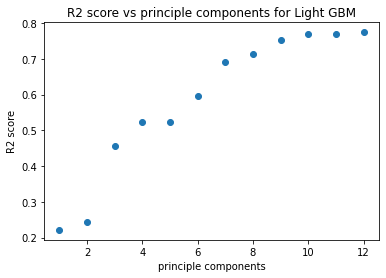

In [ ]:
plt.scatter(xlabel,r2scores_lg)
plt.title('R2 score vs principle components for Light GBM')
plt.xlabel('principle components')
plt.ylabel('R2 score')
plt.show()

fitting the data into pipeline for model XGBooster without using PCA

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_pipeline_xgb = Pipeline(steps=[(' Preprocessing_Column_transformation',transformation()),('Decision_tree',XGBRegressor() )])

In [ ]:
model_pipeline_xgb.fit(Xtrain,Ytrain)
model_pred=model_pipeline_xgb.predict(Xtest)
print('R-Score',r2_score(model_pred,Ytest))

[12:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Score 0.696802794394688


Storing the r2_score for different principle components for XGBooster using Pipeline

In [ ]:
r2scores_xg=[]
max_score=0
for i in range(3,15):
  p=PCA(n_components=i)
  p.fit(X)
  x=p.transform(X)
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,Y,test_size=0.3,random_state=0)
  model_pipeline_xgb = Pipeline(steps=[('Preprocessing_Column_transformation',transformation()),('XGB', XGBRegressor())])
  model_pipeline_xgb.fit(Xtrain,Ytrain)
  model_pred=model_pipeline_xgb.predict(Xtest)
  score=r2_score(model_pred,Ytest)
  r2scores_xg.append(score)
  if score>max_score:
    max_score=score
  print(i,'R-Score',score)
print('max r2_score',max_score)
print(r2scores_xg)

[13:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 R-Score -0.044081850402335476
[13:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4 R-Score -0.015529912738042606
[13:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 R-Score 0.14923159284859233
[13:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
6 R-Score 0.20308402020916416
[13:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7 R-Score 0.2002011650406077
[13:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
8 R-Score 0.31333655467196486
[13:22:24] WARNING: /workspace/src/objective/regression

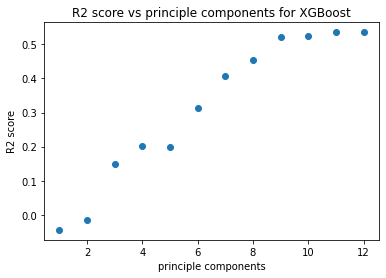

In [ ]:
plt.scatter(xlabel,r2scores_xg)
plt.title('R2 score vs principle components for XGBoost')
plt.xlabel('principle components')
plt.ylabel('R2 score')
plt.show()

fitting the data into pipeline for model Random Forest Regressor without using PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_pipeline_RF = Pipeline(steps=[(' Preprocessing_Column_transformation',transformation()),('Random Forest',RandomForestRegressor() )])

In [ ]:
model_pipeline_RF.fit(Xtrain,Ytrain)
model_pred=model_pipeline_RF.predict(Xtest)
print('R-Score',r2_score(model_pred,Ytest))

R-Score 0.8431885124437962


Storing the r2_score for different principle components for Random Forest Regressor using Pipeline

In [ ]:
r2scores_rf=[]
max_score=0
for i in range(3,15):
  p=PCA(n_components=i)
  p.fit(X)
  x=p.transform(X)
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,Y,test_size=0.3,random_state=0)
  model_pipeline_rf = Pipeline(steps=[('Preprocessing_Column_transformation',transformation()),('Random Forest',RandomForestRegressor())])
  model_pipeline_rf.fit(Xtrain,Ytrain)
  model_pred=model_pipeline_rf.predict(Xtest)
  score=r2_score(model_pred,Ytest)
  r2scores_rf.append(score)
  if score>max_score:
    max_score=score
  print(i,'R-Score',score)
print('max r2_score',max_score)
print(r2scores_rf)

3 R-Score 0.4286958801089683
4 R-Score 0.4638409046279698
5 R-Score 0.6023743737862703
6 R-Score 0.6471320359358883
7 R-Score 0.6170067302805247
8 R-Score 0.6432718962294169
9 R-Score 0.7342363865527384
10 R-Score 0.7450697228086353
11 R-Score 0.7757326527491284
12 R-Score 0.7843011666962938
13 R-Score 0.7897494789334881
14 R-Score 0.7954958223529153
max r2_score 0.7954958223529153
[0.4286958801089683, 0.4638409046279698, 0.6023743737862703, 0.6471320359358883, 0.6170067302805247, 0.6432718962294169, 0.7342363865527384, 0.7450697228086353, 0.7757326527491284, 0.7843011666962938, 0.7897494789334881, 0.7954958223529153]


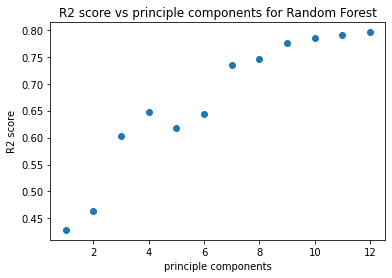

In [ ]:
plt.scatter(xlabel,r2scores_rf)
plt.title('R2 score vs principle components for Random Forest')
plt.xlabel('principle components')
plt.ylabel('R2 score')
plt.show()

In [ ]:
#The highest R2_score is 0.86 for LightGBM without applying the dimension reduction technique PCA